# Investigating Airplane Accidents

In this project we'll be working with a data set that contains 77282 aviation accidents that occurred in the US. 
- We'll use different data structures to do the analysis.
- We'll use different plotting tools (matplotlib, basemap) to show our results.

In [1]:
# read in data and split to a list
f = open("AviationData.txt", "r")
reader = f.read()
aviation_data = reader.split("\n")

In [2]:
# check the first two rows
print(aviation_data[0:2])

['Event Id | Investigation Type | Accident Number | Event Date | Location | Country | Latitude | Longitude | Airport Code | Airport Name | Injury Severity | Aircraft Damage | Aircraft Category | Registration Number | Make | Model | Amateur Built | Number of Engines | Engine Type | FAR Description | Schedule | Purpose of Flight | Air Carrier | Total Fatal Injuries | Total Serious Injuries | Total Minor Injuries | Total Uninjured | Weather Condition | Broad Phase of Flight | Report Status | Publication Date | ', '20150908X74637 | Accident | CEN15LA402 | 09/08/2015 | Freeport, IL | United States | 42.246111 | -89.581945 | KFEP | albertus Airport | Non-Fatal | Substantial | Unknown | N24TL | CLARKE REGINALD W | DRAGONFLY MK |  |  |  | Part 91: General Aviation |  | Personal |  |  | 1 |  |  | VMC | TAKEOFF | Preliminary | 09/09/2015 | ']


In [3]:
# check the first two rows
print(aviation_data[-2:])

['20150729X33718 | Accident | CEN15FA325 |  | Truth or Consequences, NM | United States | 33.250556 | -107.293611 | TCS | TRUTH OR CONSEQUENCES MUNI | Fatal(2) | Substantial | Airplane | N32401 | PIPER | PA-28-151 | No | 1 | Reciprocating | Part 91: General Aviation |  | Personal |  | 2 |  |  |  |  | UNKNOWN | Preliminary | 08/10/2015 | ', '']


In [4]:
# delete the last row
print(len(aviation_data))
aviation_data = aviation_data[:-1]
print(len(aviation_data))

77283
77282


In [5]:
# split data into a list of lists
aviation_list = []
for row in aviation_data:
    row_list = row.split(" | ")
    aviation_list.append(row_list)
print(aviation_list[0:2])
print(aviation_list[-2:])
# from the result we know that the first list contains column names

[['Event Id', 'Investigation Type', 'Accident Number', 'Event Date', 'Location', 'Country', 'Latitude', 'Longitude', 'Airport Code', 'Airport Name', 'Injury Severity', 'Aircraft Damage', 'Aircraft Category', 'Registration Number', 'Make', 'Model', 'Amateur Built', 'Number of Engines', 'Engine Type', 'FAR Description', 'Schedule', 'Purpose of Flight', 'Air Carrier', 'Total Fatal Injuries', 'Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjured', 'Weather Condition', 'Broad Phase of Flight', 'Report Status', 'Publication Date', ''], ['20150908X74637', 'Accident', 'CEN15LA402', '09/08/2015', 'Freeport, IL', 'United States', '42.246111', '-89.581945', 'KFEP', 'albertus Airport', 'Non-Fatal', 'Substantial', 'Unknown', 'N24TL', 'CLARKE REGINALD W', 'DRAGONFLY MK', '', '', '', 'Part 91: General Aviation', '', 'Personal', '', '', '1', '', '', 'VMC', 'TAKEOFF', 'Preliminary', '09/09/2015', '']]
[['20010711X01367', 'Incident', 'DCA00WA063', '', 'Cuzco, Peru', 'Peru', '', '', '', '', 

## Search a value in the data

In [6]:
import time

In [7]:
# search through the list of lists for a value, it takes O(n*m)
def lax_code_exp():
    lax_code = []
    for row in aviation_list:
        for item in row:
            if item.strip() == "LAX94LA336":
                lax_code.append(row)
    return lax_code

In [8]:
# use the above algorithm to get the result
t = time.time()
lax_code1 = lax_code_exp()
time_used = time.time()-t
print(lax_code1)
print(time_used)

[['20001218X45447', 'Accident', 'LAX94LA336', '07/19/1962', 'BRIDGEPORT, CA', 'United States', '', '', '', '', 'Fatal(4)', 'Destroyed', '', 'N5069P', 'PIPER', 'PA24-180', 'No', '1', 'Reciprocating', '', '', 'Personal', '', '4', '0', '0', '0', 'UNK', 'UNKNOWN', 'Probable Cause', '09/19/1996', '']]
0.383999824524


## Linear and Log Time Algorithm

In [9]:
# search through the list to get the value, it takes O(n) time
def lax_code_linear():
    lax_code = []
    for row in aviation_data:
        if "LAX94LA336" in row:
            lax_code.append(row)
    return lax_code

In [10]:
# use the above algorithm to get the result
t =time.time()
lax_code2 = lax_code_linear()
time_used = time.time() -t
print(lax_code2)
print(time_used)

['20001218X45447 | Accident | LAX94LA336 | 07/19/1962 | BRIDGEPORT, CA | United States |  |  |  |  | Fatal(4) | Destroyed |  | N5069P | PIPER | PA24-180 | No | 1 | Reciprocating |  |  | Personal |  | 4 | 0 | 0 | 0 | UNK | UNKNOWN | Probable Cause | 09/19/1996 | ']
0.0209999084473


In [11]:
# try to write a log(n) algorithm. In order to do so, we need to order the list
sorted_aviation_list = sorted(aviation_list, key=lambda row: row[2])

In [12]:
# search through the list using binary search
def lax_code_log():
    lower_bound = 0
    upper_bound = len(sorted_aviation_list) -1
    index = (lower_bound + upper_bound)/2
    code = sorted_aviation_list[index][2]
    while (code!= "LAX94LA336") & (upper_bound > lower_bound):
        if code > "LAX94LA336":
            upper_bound = index-1
        elif code < "LAX94LA336":
            lower_bound = index+1
        index = (lower_bound+upper_bound)/2
        code = sorted_aviation_list[index][2]
    if code == "LAX94LA336":
        return sorted_aviation_list[index]
    else:
        return None      

In [13]:
# use the above algorithm to get the result
t =time.time()
lax_code3 = lax_code_log()
time_used = time.time() -t
print(lax_code3)
print(time_used)

['20001218X45447', 'Accident', 'LAX94LA336', '07/19/1962', 'BRIDGEPORT, CA', 'United States', '', '', '', '', 'Fatal(4)', 'Destroyed', '', 'N5069P', 'PIPER', 'PA24-180', 'No', '1', 'Reciprocating', '', '', 'Personal', '', '4', '0', '0', '0', 'UNK', 'UNKNOWN', 'Probable Cause', '09/19/1996', '']
0.000999927520752


## Hash Tables

In [14]:
# store the data as a list of dictionaries
aviation_dict_list = []
keys = aviation_data[0].split(" | ")[:-1]
keys_num = len(keys)
for row in aviation_data[1:]:
    row_list = row.split(" | ")[:-1]
    row_dict = dict()
    for i in range(keys_num):
        row_dict[keys[i]] = row_list[i]
    aviation_dict_list.append(row_dict)

In [15]:
aviation_dict_list[0]

{'Accident Number': 'CEN15LA402',
 'Air Carrier': '',
 'Aircraft Category': 'Unknown',
 'Aircraft Damage': 'Substantial',
 'Airport Code': 'KFEP',
 'Airport Name': 'albertus Airport',
 'Amateur Built': '',
 'Broad Phase of Flight': 'TAKEOFF',
 'Country': 'United States',
 'Engine Type': '',
 'Event Date': '09/08/2015',
 'Event Id': '20150908X74637',
 'FAR Description': 'Part 91: General Aviation',
 'Injury Severity': 'Non-Fatal',
 'Investigation Type': 'Accident',
 'Latitude': '42.246111',
 'Location': 'Freeport, IL',
 'Longitude': '-89.581945',
 'Make': 'CLARKE REGINALD W',
 'Model': 'DRAGONFLY MK',
 'Number of Engines': '',
 'Publication Date': '09/09/2015',
 'Purpose of Flight': 'Personal',
 'Registration Number': 'N24TL',
 'Report Status': 'Preliminary',
 'Schedule': '',
 'Total Fatal Injuries': '',
 'Total Minor Injuries': '',
 'Total Serious Injuries': '1',
 'Total Uninjured': '',
 'Weather Condition': 'VMC'}

In [16]:
# use dictionary to search the value
def lax_code_dict():
    lax_dict = []
    for row in aviation_dict_list:
        for key in keys:
            if row[key] == "LAX94LA336":
                lax_dict.append(row)
    return lax_dict            

In [17]:
# use the above algorithm to get the result
t =time.time()
lax_code4 = lax_code_dict()
time_used = time.time() -t
print(lax_code4)
print(time_used)

[{'Amateur Built': 'No', 'Make': 'PIPER', 'Location': 'BRIDGEPORT, CA', 'Total Uninjured': '0', 'Latitude': '', 'Event Id': '20001218X45447', 'Airport Name': '', 'Aircraft Category': '', 'Investigation Type': 'Accident', 'Report Status': 'Probable Cause', 'Event Date': '07/19/1962', 'Total Fatal Injuries': '4', 'Country': 'United States', 'Weather Condition': 'UNK', 'Registration Number': 'N5069P', 'Accident Number': 'LAX94LA336', 'Number of Engines': '1', 'Longitude': '', 'Air Carrier': '', 'Total Serious Injuries': '0', 'Airport Code': '', 'Model': 'PA24-180', 'Broad Phase of Flight': 'UNKNOWN', 'Publication Date': '09/19/1996', 'FAR Description': '', 'Engine Type': 'Reciprocating', 'Schedule': '', 'Purpose of Flight': 'Personal', 'Aircraft Damage': 'Destroyed', 'Injury Severity': 'Fatal(4)', 'Total Minor Injuries': '0'}]
0.301000118256


## Accidents by U.S State

we now have two representations of the data: aviation_dict_list and aviation_list. We are going to use both structure to count how many accidents occurred in each US state.

In [18]:
us_states = ['AL','AK', 'AZ','AR','CA','CO','CT', 'DE','DC','FL', 'GA','HI','ID','IL','IN','IA','KS','KY','LA','ME',
             'MD','MA','MI','MN','MS','MO','MT','NE','NV','NH', 'NJ', 'NM', 'NY', 'NC','ND','MP', 'OH', 'OK',
             'OR', 'PA', 'PR', 'RI','SC', 'SD','TN', 'TX', 'UT','VT','VI','VA','WA', 'WV', 'WI', 'WY', 'AS','MP','GU']

In [19]:
# use list of dictionaries (aviation_dict_list) to find the answer
t1 =time.time()
state_accidents = {el:0 for el in us_states}
for item in aviation_dict_list:
    location = item["Location"]
    if len(location.split(",")) ==2:
        state = location.split(",")[1].strip()
        if state in us_states:
            state_accidents[state] += 1
t2 = time.time()
most_accidents_state = max(state_accidents, key=state_accidents.get)
most_accidents = state_accidents[most_accidents_state]
t3 = time.time()
print(t2-t1)
print(t3-t2)
print(most_accidents_state, most_accidents)

0.176000118256
0.0
('CA', 8029)


In [20]:
# use list of lists (aviation_list) to find the answer
t1 =time.time()
state_accidents = {el:0 for el in us_states}
for item in aviation_list[1:]:
    location = item[4]
    if len(location.split(",")) ==2:
        state = location.split(",")[1].strip()
        if state in us_states:
            state_accidents[state] += 1
t2 = time.time()
most_accidents_state = max(state_accidents, key=state_accidents.get)
most_accidents = state_accidents[most_accidents_state]
t3 = time.time()
print(t2-t1)
print(t3-t2)
print(most_accidents_state, most_accidents)

0.171999931335
0.0
('CA', 8029)


In [21]:
# change keys(state names) of state_accidents from abbreviations to full names
state_names = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

state_accidents = dict((state_names[key], value) for (key, value) in state_accidents.items())

In [22]:
# sort state_accidents by values(accident numbers)
sorted_state_accidents = sorted(state_accidents.items(), key=lambda x: x[1], reverse = True)
import collections
sorted_state_accidents_dict = collections.OrderedDict(sorted_state_accidents)

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

Text(0.5,1,'Fatal and Serious Injuries per State')

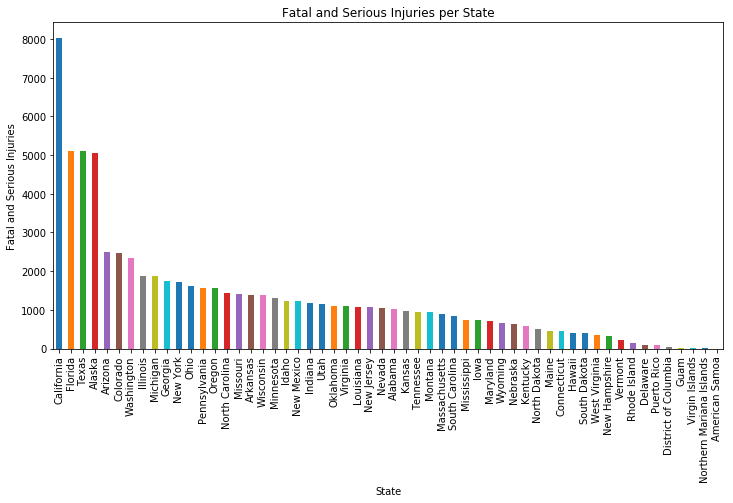

In [24]:
# draw a bar figure to display state_accidents
fig = plt.figure(figsize = (12,6))
pd.Series(sorted_state_accidents_dict).plot.bar()
plt.xlabel("State")
plt.ylabel("Fatal and Serious Injuries")
plt.title('Fatal and Serious Injuries per State')

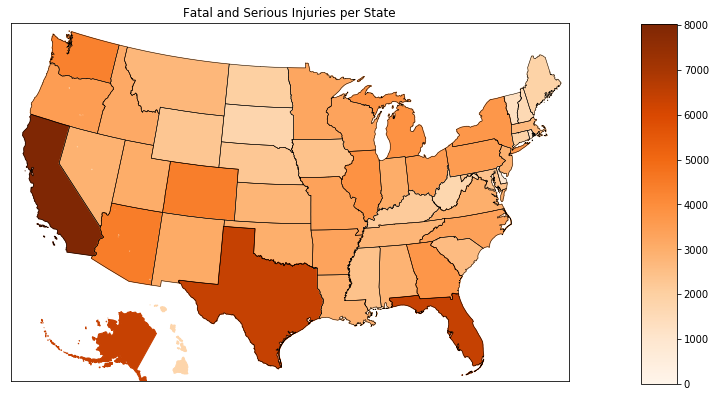

In [25]:
# use basemap to display state_accidents

# I've learned how to use basemap to plot us with 50 states from this post:
# https://stackoverflow.com/questions/39742305/how-to-use-basemap-python-to-plot-us-with-50-states
# I've learned how to add colorbar from this post:
# https://stackoverflow.com/questions/43646097/add-colorbar-for-polygones-in-basemap-plot-of-us

import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import rgb2hex, Normalize
from matplotlib.patches import Polygon
from matplotlib.colorbar import ColorbarBase

fig, ax = plt.subplots(figsize=(10,10))
# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# draw state boundaries.
# data from U.S Census Bureau
# http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('st99_d00','states',drawbounds=True)
# choose a color for each state based on population density.
colors={}
statenames=[]
cmap = plt.cm.Oranges # use 'Orange' colormap
vmin = 0; vmax = float(max(state_accidents.values())) # set range.
norm = Normalize(vmin=vmin, vmax=vmax)
for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico.
    if statename not in ['District of Columbia','Puerto Rico']:
        acc = state_accidents[statename]
        # calling colormap with value between 0 and 1 returns
        # rgba value.  Invert color range (hot colors are high
        # population), take sqrt root to spread out colors more.
        colors[statename] = cmap(np.sqrt((acc-vmin)/(vmax-vmin)))[:3]
    statenames.append(statename)
# cycle through state names, color each one.
ax = plt.gca() # get current axes instance
for nshape,seg in enumerate(m.states):
    # skip DC and Puerto Rico.
    if statenames[nshape] not in ['District of Columbia','Puerto Rico']:
    # Offset Alaska and Hawaii to the lower-left corner. 
        if statenames[nshape] == 'Alaska':
        # Alaska is too big. Scale it down to 3% first, then transate it. 
            seg = list(map(lambda (x,y): (0.3*x + 1100000, 0.3*y-1300000), seg))
        if statenames[nshape] == 'Hawaii':
            seg = list(map(lambda (x,y): (x + 5100000, y-1400000), seg))
            
        color = rgb2hex(colors[statenames[nshape]]) 
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)

plt.title('Fatal and Serious Injuries per State')
cax = fig.add_axes([1, 0.25, 0.05, 0.5]) # posititon
cb = ColorbarBase(cax,cmap=cmap,norm=norm, orientation='vertical')
plt.show()

## Fatalities and Injuries by Month

In [26]:
# use list of dictionaries (aviation_dict_list) to find the answer
t1 =time.time()
monthly_injuries= {}
for item in aviation_dict_list:
    date = item["Event Date"]
    if len(date.split("/")) ==3:
        month = int(date.split("/")[0])
        if item["Total Fatal Injuries"] == "":
            Total_Fatal_Injuries = 0
        else:
            Total_Fatal_Injuries = int(item["Total Fatal Injuries"])
        if item["Total Serious Injuries"] =="":
            Total_Serious_Injuries = 0
        else:
            Total_Serious_Injuries = int(item["Total Serious Injuries"])
        if month in monthly_injuries:
            monthly_injuries[month] += Total_Fatal_Injuries+Total_Serious_Injuries
        else:
            monthly_injuries[month] = Total_Fatal_Injuries+Total_Serious_Injuries
t2 = time.time()
most_accidents_month = max(monthly_injuries, key=monthly_injuries.get)
most_accidents = monthly_injuries[most_accidents_month]
t3 = time.time()
print(t2-t1)
print(t3-t2)
print(most_accidents_month, most_accidents)

0.331000089645
0.0
(7, 7003)


Text(0.5,1,'Injuries per Month')

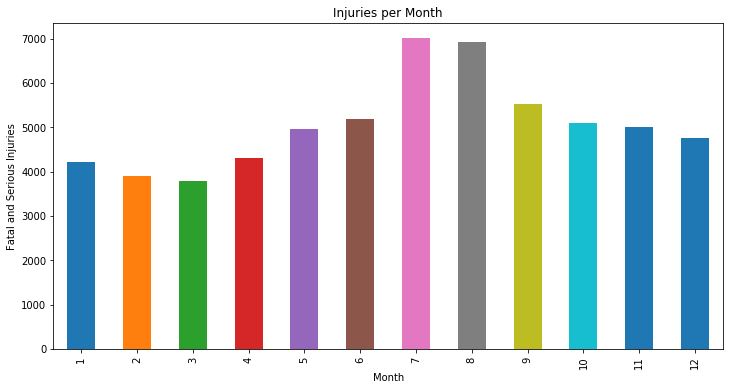

In [27]:
# draw a bar figure to display monthly_injuries
fig = plt.figure(figsize = (12,6))
pd.Series(monthly_injuries).plot.bar()
plt.xlabel("Month")
plt.ylabel("Fatal and Serious Injuries")
plt.title("Injuries per Month")

In [28]:
# turn monthly_injuries into two lists - one with the month names, and one with the counts
monthly_injuries_list = [[],[]]
for key in sorted(monthly_injuries):
    monthly_injuries_list[0].append(key)
    monthly_injuries_list[1].append(monthly_injuries[key])
monthly_injuries_list

[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [4224, 3907, 3797, 4318, 4955, 5191, 7003, 6924, 5529, 5092, 4995, 4747]]